In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def sythetic_data(w, b, num_examples):
    """生成 y = Xw + b +噪声 """
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = sythetic_data(true_w, true_b, 1000)

tensor([[-0.7275, -0.5408],
        [-0.1844, -0.9593],
        [ 0.0482,  0.7889],
        ...,
        [-1.2727,  2.7019],
        [ 1.3662, -0.8601],
        [-1.5293,  2.8536]])

In [5]:
labels.size()
labels

tensor([[ 4.5761e+00],
        [ 7.1023e+00],
        [ 1.6282e+00],
        [ 4.0835e+00],
        [ 1.3747e+00],
        [ 3.3746e+00],
        [ 4.0432e+00],
        [ 2.4476e+00],
        [ 7.6704e+00],
        [-8.4491e-01],
        [ 7.9553e+00],
        [ 3.8134e+00],
        [ 4.0427e+00],
        [-3.2052e+00],
        [ 4.9891e+00],
        [ 2.6907e-01],
        [ 8.1255e+00],
        [ 6.3385e+00],
        [ 6.7294e-01],
        [ 1.6132e+00],
        [-2.8557e+00],
        [ 3.5604e-01],
        [-2.5964e+00],
        [-3.5087e+00],
        [-5.4456e-01],
        [ 8.2997e+00],
        [ 8.9916e+00],
        [ 8.7361e+00],
        [ 1.6369e+00],
        [ 4.4288e+00],
        [-4.5796e-01],
        [ 1.1950e+01],
        [ 3.2991e+00],
        [ 7.2319e+00],
        [ 1.6348e+00],
        [ 3.1149e+00],
        [-6.1127e-01],
        [-3.4104e+00],
        [ 6.1124e+00],
        [ 2.9592e+00],
        [ 7.6366e+00],
        [ 2.6942e+00],
        [ 1.6962e+01],
        [ 1

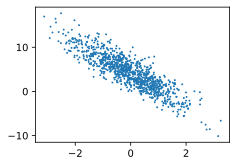

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [7]:
def data_iter(batch_size, feature, labels):
    num_examples = len(feature)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield feature[batch_indices], labels[batch_indices]

In [8]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X,'\n', y)
    break

tensor([[-0.2652, -0.3319],
        [ 1.6922, -1.2477],
        [ 1.1846,  0.0168],
        [-1.6549, -0.1662],
        [-0.8926,  0.3557],
        [-0.4846,  0.8197],
        [ 0.6174, -0.4182],
        [ 1.4604, -1.5428],
        [ 0.3666, -1.0582],
        [-0.0238, -0.5011]]) 
 tensor([[ 4.7919],
        [11.8474],
        [ 6.5235],
        [ 1.4496],
        [ 1.2082],
        [ 0.4474],
        [ 6.8568],
        [12.3726],
        [ 8.5266],
        [ 5.8499]])


In [9]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [10]:
def linreg(X, w, b):
    """"线性回归模型"""
    return torch.matmul(X, w) + b

In [11]:
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [12]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()

In [13]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for eporch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)

    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch B{eporch + 1}, loss {float(train_l.mean()):f}')

epoch B1, loss 0.032414
epoch B2, loss 0.000132
epoch B3, loss 0.000051


In [14]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0005, -0.0002], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0006], grad_fn=<RsubBackward1>)
